https://github.com/BY571/Medium_Code_Examples/blob/master/Gridworld/Monte%20Carlo%20Methods%20Examples.ipynb
https://github.com/dennybritz/reinforcement-learning/blob/master/lib/envs/blackjack.py
https://towardsdatascience.com/reinforcement-learning-implement-grid-world-from-scratch-c5963765ebff

In [1]:
import copy
from collections import defaultdict

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from gridworld import *

plt.rcParams['font.family'] = "serif"

In [2]:
# init the environment:
seed_ = 1926
max_episodes = 3000
env = Gridworld(step_cost=-0.1,max_ep_length=30)
Returns = {"0":[], "1":[], "2":[], "3":[],
           "4":[], "5":[], "6":[], "7":[],
           "8":[], "9":[], "10":[], "11":[]}
V = defaultdict(float)
for i in range(12):
    V[i] = 0
V[3] = 1 # Goal
V[7] = -1 # Death
V[5] = 0 # Rock
g = 0.99 # discounting factor

returns_sum = defaultdict(float)
returns_count = defaultdict(float)

In [3]:
for i_episode in range(1, max_episodes + 1):

    # Generate an episode.
    # An episode is an array of (state, action, reward) tuples
    episode = []
    state = env.reset()
    # np.random.seed(seed_)
    for t in range(max_episodes):
        action = np.random.randint(4) #random policy
        next_state, reward, done = env.step(action)
        episode.append((state, action, reward))
        state = next_state
        if done:
            break

    states_in_episode = ([x[0] for x in episode])
    for state in states_in_episode:
        # Find the first occurance of the state in the episode
        first_occurence_idx = next(i for i,x in enumerate(episode) if x[0] == state)
        # Sum up all rewards since the first occurance
        G = sum([x[2]*(g**i) for i,x in enumerate(episode[first_occurence_idx:])])
        # Calculate average return for this state over all sampled episodes
        returns_sum[state] += G
        returns_count[state] += 1.0
        V[state] = returns_sum[state] / returns_count[state]

In [4]:
# Change the second value of episode to a string with following values:
# 0: up, 1: right, 2: left, 3: down
mapped_episode = copy.deepcopy(episode)
for i in range(len(mapped_episode)):
    if mapped_episode[i][1] == 0:
        mapped_episode[i] = (mapped_episode[i][0], "up", mapped_episode[i][2])
    elif mapped_episode[i][1] == 1:
        mapped_episode[i] = (mapped_episode[i][0], "right", mapped_episode[i][2])
    elif mapped_episode[i][1] == 2:
        mapped_episode[i] = (mapped_episode[i][0], "left", mapped_episode[i][2])
    elif mapped_episode[i][1] == 3:
        mapped_episode[i] = (mapped_episode[i][0], "down", mapped_episode[i][2])
mapped_episode

[(8, 'up', -0.1),
 (4, 'left', -0.1),
 (4, 'right', -0.1),
 (4, 'down', -0.1),
 (8, 'right', -0.1),
 (9, 'down', -0.1),
 (9, 'left', -0.1),
 (8, 'down', -0.1),
 (8, 'down', -0.1),
 (8, 'up', -0.1),
 (4, 'down', -0.1),
 (8, 'up', -0.1),
 (4, 'down', -0.1),
 (8, 'left', -0.1),
 (8, 'left', -0.1),
 (8, 'up', -0.1),
 (4, 'down', -0.1),
 (8, 'down', -0.1),
 (8, 'left', -0.1),
 (8, 'right', -0.1),
 (9, 'up', -0.1),
 (9, 'right', -0.1),
 (10, 'up', -0.1),
 (6, 'up', -0.1),
 (2, 'up', -0.1),
 (2, 'down', -0.1),
 (6, 'right', -1)]

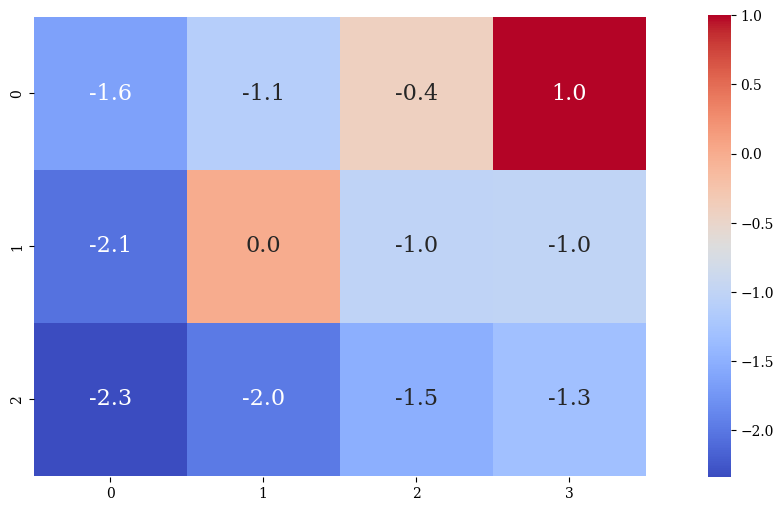

In [5]:
# Plot of the grid with values of each state
V = sorted(V.items(), key=lambda x: x[0])
V = np.array([x[1] for x in V]).reshape(3, 4)

plot_state_value_grid(V)
